# Prediction Heart Disease using Machine Learning

This notebook uses various ML and Data Science libraries in an attempt to build a model that can classify whether a patient has a heart disease or not based on their medical attributes.

**Steps**
1. Problem Definition.
2. Data - Gathering and exploring the data
3. Evaluation - What is the goal of the project
4. Features
5. Modelling
6. Experimentaion

## 1. Problem Definition

> Given clinical parameters of a patient, we have to predict whether the patient has heart disease or not. 

## 2. Data

Excerpt from UCI - This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

UCI Machine Learning Repo - https://archive.ics.uci.edu/dataset/45/heart+disease
Kaggle - https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> The model should achieve atleast 85% accuracy in predicting whether a patient has a heart disease or not.

## 4. Features 

Columns - 

1. `age`: age in years  
2. `sex`: sex (1 = male; 0 = female)  
3. `cp`: chest pain type
    1. Value 0: typical angina  
    2. Value 1: atypical angina  
    3. Value 2: non-anginal pain  
    4. Value 3: asymptomatic

4. `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
5. `chol`: serum cholestoral in mg/dl
6. `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. `restecg`: resting electrocardiographic results
    1. Value 0: normal
    2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina (1 = yes; 0 = no)
10. `oldpeak`: ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment 
    1. Value 0: upsloping
    2. Value 1: flat
    3. Value 2: downsloping
12. `ca`: number of major vessels (0-3) colored by flourosopy
13. `thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. `target`: predicted label, 0 = no disease, 1 = disease

## Preparing the tools


In [1]:
# EDA (Exploratory Data Analysis) and plotting libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA - Exploratory Data Analysis)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

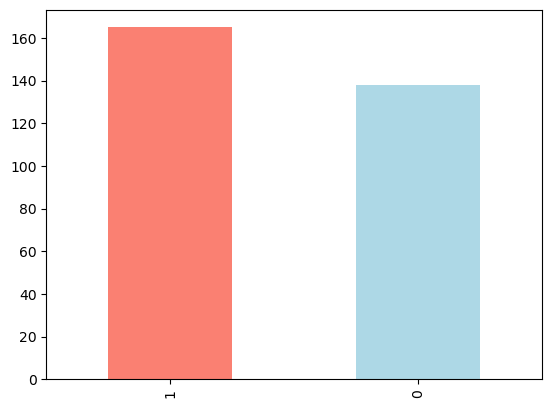

In [7]:
df["target"].value_counts().plot(kind="bar", color = ["salmon", "lightblue"]);

This is a relatively balanced classification problem as the patients having heart disease (165) and patients not having heart disease (138) are relatively similar.

### Heart Disease according to sex of the patient

In [8]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

There are far more male patients than female patients

In [9]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


From the crosstab we can see that of the 96 female patients, 72 have heart disease.  
This means that for a female patient there's a `75%` chance that she would have a heart disease based on our dataset.  
However, for males this is more balanced - 93 out of 207 - `44%`.

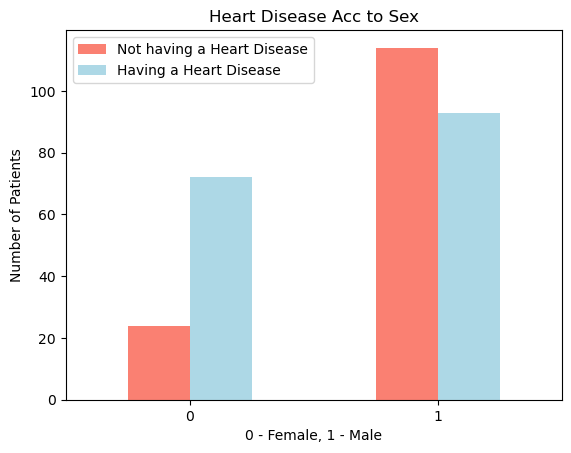

In [10]:
pd.crosstab(df["sex"], df["target"]).plot(kind = "bar", color = ["salmon", "lightblue"])
plt.title("Heart Disease Acc to Sex")
plt.xlabel("0 - Female, 1 - Male")
plt.ylabel("Number of Patients")
plt.legend(["Not having a Heart Disease", "Having a Heart Disease"])
plt.xticks(rotation = 0);

### Heart Disease acc to Age and Thalach ( Max Heart Rate)

In [11]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

There are 91 unique values for thalach. In such a diverse feature, scatter plots would be better than bar plots

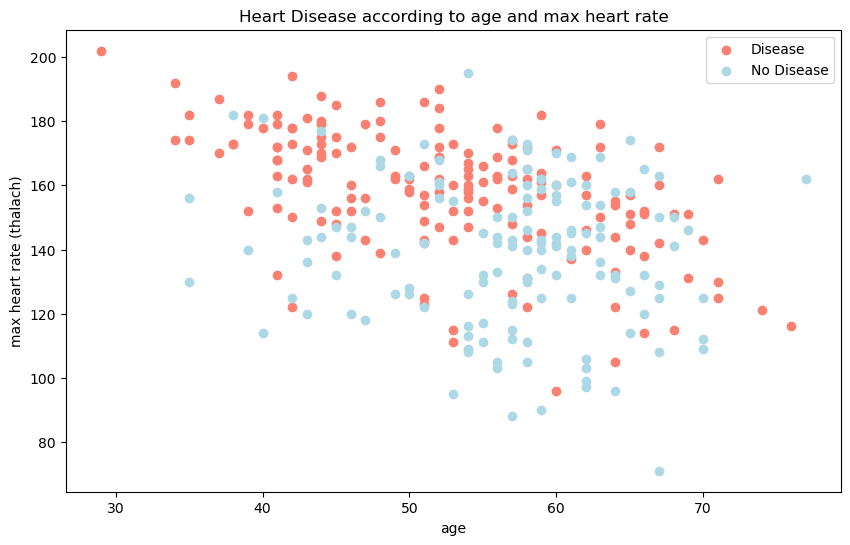

In [12]:
plt.figure(figsize=(10,6))

# Positive Examples (with heart disease)
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "salmon")

# Negative Examples (no heart disease)
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "lightblue")

# Extra information
plt.title("Heart Disease according to age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate (thalach)")
plt.legend(["Disease", "No Disease"]);

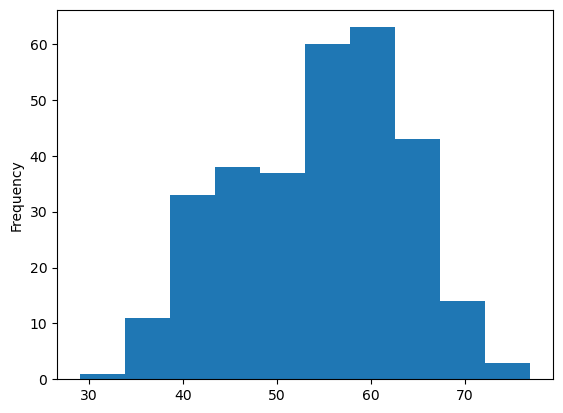

In [13]:
# Distribution of age
df.age.plot.hist();

The graph is a normal distribution leaning towards the 60 age mark. There are not any outliers based on age.

### Correlation Matrix

In [14]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


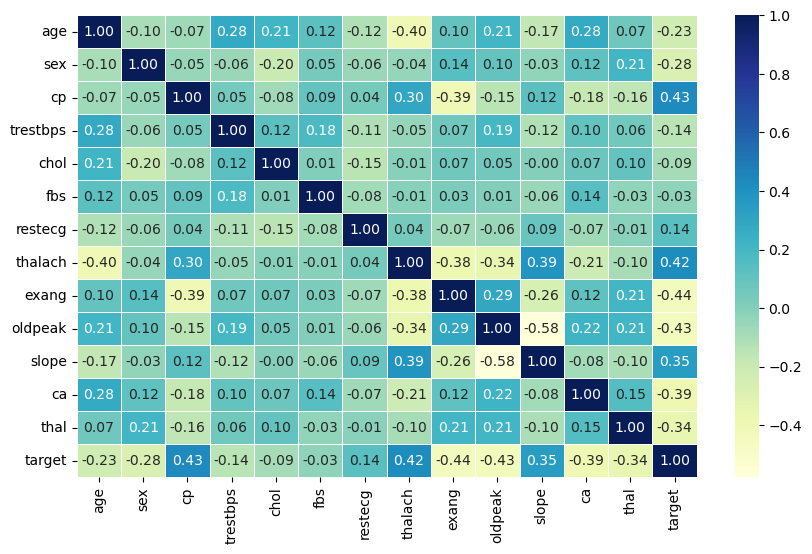

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");

From the Correlation Matrix we can see that higher values of features like cp(chest pain) and thalach(max heart beat) result in positive correlation with the target label (i.e. target is positive for higher values) while for features like exang, oldpeak, the relationship is inverse (i.e. lower values result in positive target).

## 5. Modelling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Splitting data into X (features) and y (label)
X = df.drop("target", axis=1)
y = df["target"]

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Splitting the data into training and test splits
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [22]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [23]:
len(X_train), len(y_train), len(X_test), len(y_test)

(242, 242, 61, 61)

We're going to be using 3 classification models - 
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Let's make a function for fittting and evaluating models
def model_fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits the data (X_train, X_test, y_train, y_test) into all the models in the dictionary (models) 
    and returns evaluation scores (default of each model) for them.
    models : dictionary containing models.
    '''
    np.random.seed(0)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [26]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}

baseline_scores = model_fit_and_score(models, X_train, X_test, y_train, y_test)
baseline_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

In [27]:
baseline_compare = pd.DataFrame(baseline_scores, index = ["accuracy"])
baseline_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.852459,0.639344,0.885246


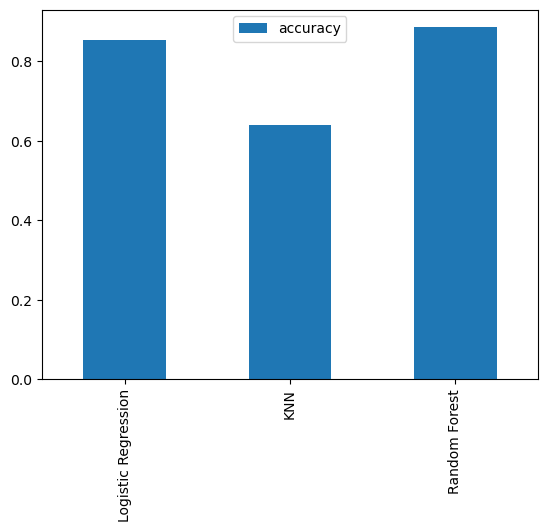

In [28]:
baseline_compare.T.plot.bar();

Now that we have baseline model predictions, let's move on to - 
* Hyperparameter Tuning
* Feature importance
* Confusion matrix
* Cross - validation
* Precision
* F1 score
* Recall
* Classification report
* ROC Curve
* AUC Score

### Hyperparameter Tuning (by hand)

**KNN**

In [29]:
# Let's tune the knn classifier

knn = KNeighborsClassifier()
neighbors = range(1,21) # Range of neighbors from 1 to 20
train_score = []
test_score = []

for neighbor_amount in neighbors:
    knn.set_params(n_neighbors = neighbor_amount)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))


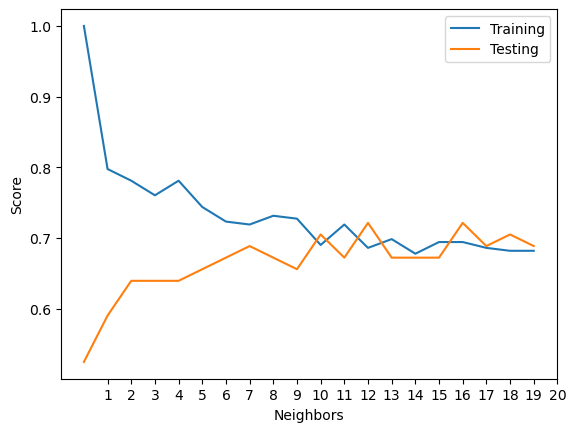

In [30]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("Neighbors")
plt.ylabel("Score")
plt.legend(["Training", "Testing"])
plt.xticks(ticks = np.arange(1,21));

In [31]:
print(f"Max KNN Score : {max(test_score) * 100 :.2f}%")

Max KNN Score : 72.13%


The KNN Classifier is worse than the other two models even after tuning number of neighbors so it's better to churn the KNN Classifier and focus on the other two models

### Hyperparameter Tuning (using RandomizedSearchCV)

In [32]:
# Grid for Logistic regression
logreg_grid = {"C" : np.logspace(-4, 4, 20),
              "penalty": ['l1', 'l2', 'elasticnet', None],
              "solver" : ["liblinear", 'newton-cholesky']}

# Grid for Random Forest Classifier
randfor_grid  = {"n_estimators" : np.arange(0,1000,50),
                "max_depth" : [None, 3, 5, 10],
                "min_samples_split": np.arange(0,10,2),
                "min_samples_leaf" : np.arange(0, 10, 2)}

In [33]:
# Tuning Logistic Regression Classifier
np.random.seed(10)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = logreg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear',
                                                   'newton-cholesky']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'newton-cholesky', 'penalty': 'l2', 'C': 0.23357214690901212}

In [35]:
baseline_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

In [36]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [37]:
# now lets tune random forest classifier
np.random.seed(100)
rs_rand_for = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = randfor_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
rs_rand_for.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([0, 2, 4, 6, 8]),
                                        'min_samples_split': array([0, 2, 4, 6, 8]),
                                        'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700, 750, 800, 850, 900, 950])},
                   verbose=True)

In [38]:
rs_rand_for.best_params_

{'n_estimators': 950,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [39]:
rs_rand_for.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning (using GridSearchCV)

In [40]:
logreg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'penalty': ['l1', 'l2', 'elasticnet', None],
 'solver': ['liblinear', 'newton-cholesky']}

In [41]:
np.random.seed(0)
gs_logreg = GridSearchCV(LogisticRegression(),
                        param_grid = logreg_grid,
                        cv = 5,
                        verbose = True)
gs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'newton-cholesky']},
             verbose=True)

In [42]:
gs_logreg.best_params_

{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}

In [43]:
gs_logreg.score(X_test, y_test)

0.8524590163934426

### Model Evaluations

* Confusion matrix
* Precision
* F1 score
* Recall
* Classification report
* ROC Curve
* AUC Score

In [46]:
y_preds = gs_logreg.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [45]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

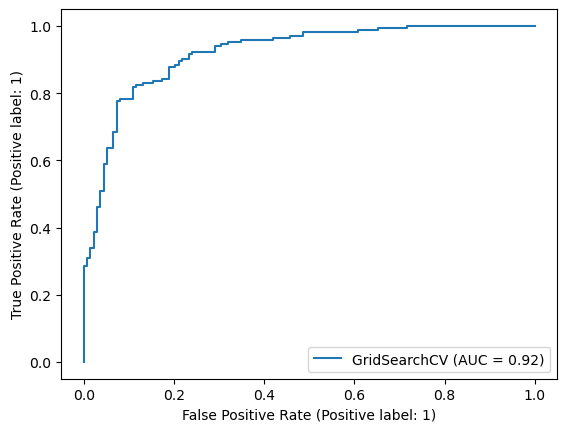

In [52]:
# ROC Curve and AUC Score
RocCurveDisplay.from_estimator(gs_logreg, X, y);

In [53]:
# confusion matrix
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 4, 30]])

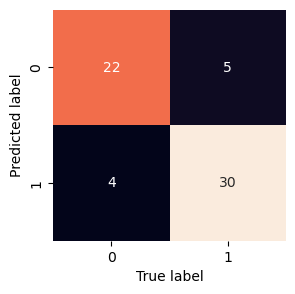

In [57]:
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot = True,
                cbar= False)
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [60]:
# Classification report (on train test split)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [61]:
# Evaluating accuracy, precision, recall, f1 using cross validation
gs_logreg.best_params_

{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}

In [63]:
clf = LogisticRegression(C = 1.623776739188721,
                        penalty = "l2",
                        solver = "liblinear")

In [64]:
# Accuracy 
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8182513661202186

In [65]:
# Precision
cv_prec = cross_val_score(clf, X, y, cv =5 , scoring = "precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8122549019607843

In [66]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [67]:
# f1 score
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8404818247075424

In [68]:
cross_val_metrics = pd.DataFrame({"Accuracy": cv_acc,
                                 "Precision": cv_prec,
                                 "Recall": cv_recall,
                                 "F1 score": cv_f1},
                                index = [0])
cross_val_metrics

,Accuracy,Precision,Recall,F1 score
0,0.818251,0.812255,0.872727,0.840482


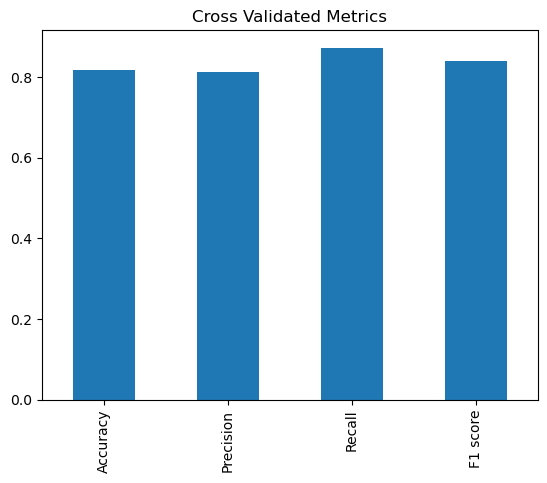

In [71]:
cross_val_metrics.T.plot.bar(title= "Cross Validated Metrics" ,legend = False);

### Feature Importance

In [72]:
clf

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [73]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [74]:
clf.coef_

array([[ 0.00655176, -1.62134806,  0.75945315, -0.0084671 , -0.00404966,
        -0.3434305 ,  0.23128621,  0.02940965, -0.88063443, -0.54161158,
         0.2134618 , -0.87123514, -0.6927829 ]])

In [76]:
feature_coef = dict(zip(df.columns, clf.coef_[0]))
feature_coef

{'age': 0.0065517585624253975,
 'sex': -1.6213480585313702,
 'cp': 0.7594531514538636,
 'trestbps': -0.008467101683917223,
 'chol': -0.004049664833738469,
 'fbs': -0.34343049664745534,
 'restecg': 0.2312862052685433,
 'thalach': 0.029409650316247673,
 'exang': -0.8806344289114787,
 'oldpeak': -0.5416115849299789,
 'slope': 0.21346179823107966,
 'ca': -0.8712351436972039,
 'thal': -0.6927828988569131}

In [77]:
feature_importance = pd.DataFrame(feature_coef, index = [0])
feature_importance

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.006552,-1.621348,0.759453,-0.008467,-0.00405,-0.34343,0.231286,0.02941,-0.880634,-0.541612,0.213462,-0.871235,-0.692783


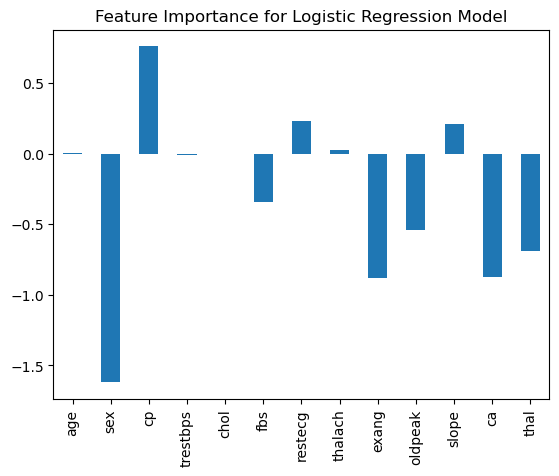

In [78]:
feature_importance.T.plot.bar(title = "Feature Importance for Logistic Regression Model", legend = False);

We see that sex is really important and inversally related (sex = 0 -> target = 1), while cp is directly related (cp = higher -> target = 1)

In [79]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [80]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [81]:
pd.crosstab(df["ca"], df["target"])

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


## Verdict

To improve the model, we need to collect more data. We explored feature importance and need to collect data more focused on the features which are important for the model (sex, ca, cp, etc).